# Проект: классификация

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection \
    import train_test_split, GridSearchCV, cross_val_score

Бизнес-задача: определить характеристики, по которым можно выявить клиентов, более склонных к открытию депозита в банке, и за счёт этого повысить результативность маркетинговой кампании.

Техническая задача для вас как для специалиста в Data Science: построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, воспользуется он предложением об открытии депозита или нет.




Данные о клиентах банка:

        age (возраст);
        job (сфера занятости);
        marital (семейное положение);
        education (уровень образования);
        default (имеется ли просроченный кредит);
        housing (имеется ли кредит на жильё);
        loan (имеется ли кредит на личные нужды);
        balance (баланс).

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

        contact (тип контакта с клиентом);
        month (месяц, в котором был последний контакт);
        day (день, в который был последний контакт);
        duration (продолжительность контакта в секундах).

Прочие признаки:

        campaign (количество контактов с этим клиентом в течение текущей кампании);
        pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
        previous (количество контактов до текущей кампании)
        poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.


## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [67]:
df = pd.read_csv('bank_fin.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [69]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
#Ваш код здесь
print(df.isna().sum())

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64


### Задание 2

In [70]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [71]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'].value_counts()

0  $            774
 1,00 $          39
 3,00 $          34
 2,00 $          34
 4,00 $          29
               ... 
 1 641,00 $       1
 5 517,00 $       1
 8 332,00 $       1
 4 859,00 $       1
-134,00 $         1
Name: balance, Length: 3802, dtype: int64

### Задание 4

In [72]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
df['balance'] = df['balance'].str.replace('$', '').str.replace(' ', '').str.replace(',00', '').str.strip().astype(float)
df['balance'].value_counts()

 0.0       774
 1.0        39
 3.0        34
 2.0        34
 4.0        29
          ... 
 1641.0      1
 5517.0      1
 8332.0      1
 4859.0      1
-134.0       1
Name: balance, Length: 3802, dtype: int64

In [73]:
df['balance'].mean()

1529.1290293615875

In [74]:
median_balance = df['balance'].median()
df['balance'] = df['balance'].fillna(median_balance)
df['balance'].mean()

1526.9360329690019

### Задание 5

In [75]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [76]:
mode_job = df['job'].mode()[0]
df['job'] = df['job'].replace('unknown', mode_job)

In [77]:
mode_edu = df['education'].mode()[0]
df['education'] = df['education'].replace('unknown', mode_edu)

In [78]:
mode_job = df['job'].mode()[0]
mode_edu = df['education'].mode()[0]
mean_balance = df[(df['job'] == mode_job) & (df['education'] == mode_edu)]['balance'].mean()
print(round(mean_balance, 3))


1598.883


In [79]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = round(Q1 - 1.5*IQR)
upper_bound = round(Q3 + 1.5*IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: -2241
Upper bound: 4063


### Задание 6

In [80]:
# удалите все выбросы для признака balance
# ваш код


# удалите все выбросы для признака balance


# Применяю заготовленную функцию для удаления выбросов методом Тьюки:

def drop_iqr(df, col, left=1.5, right=1.5, log_scale=False, add_one=False):
    """Drop outliers using the interquartile range method (Tukey's method)

    Args:
        df (DataFrame): pandas DataFrame
        col (str): column name
        log_scale (bool, optional): converting to the natural log scale. 
                                    Defaults to False.
        add_one (bool, optional): add 1 to all values, 
                                  (works for the log scale only,
                                  usefull if there are zeros in data). 
                                  Defaults to False.
        left (float, optional): lower IQR bound. Defaults to 1.5.
        right (float, optional): upper IQR bound. Defaults to 1.5.

    Returns:
        tuple: a tuple containing the cleaned dataframe, the calculated 
               lower and upper bounds, and the dataframe with outliers
    """
    
    if log_scale and add_one:
        x = np.log(df[col]+1)
    elif log_scale and not add_one:
        x = np.log(df[col])
    else:
        x = df[col]
    
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*left)
    upper_bound = quartile_3 + (iqr*right)
    outliers = df[(x<lower_bound) | (x>upper_bound)]
    clean_df = df[(x>=lower_bound) & (x<=upper_bound)]
    
    return clean_df, lower_bound, upper_bound, outliers


df, lower_bound, upper_bound, _ = drop_iqr(df, 'balance')
print(lower_bound, upper_bound, df.shape[0])



-2241.0 4063.0 10105


## Часть 2:  Разведывательный анализ

### Задание 1

In [81]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

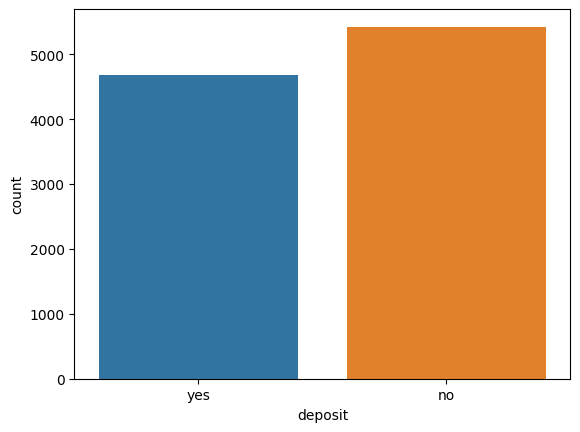

In [82]:
sns.countplot(data=df, x='deposit');

### Задания 2 и 3

In [83]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


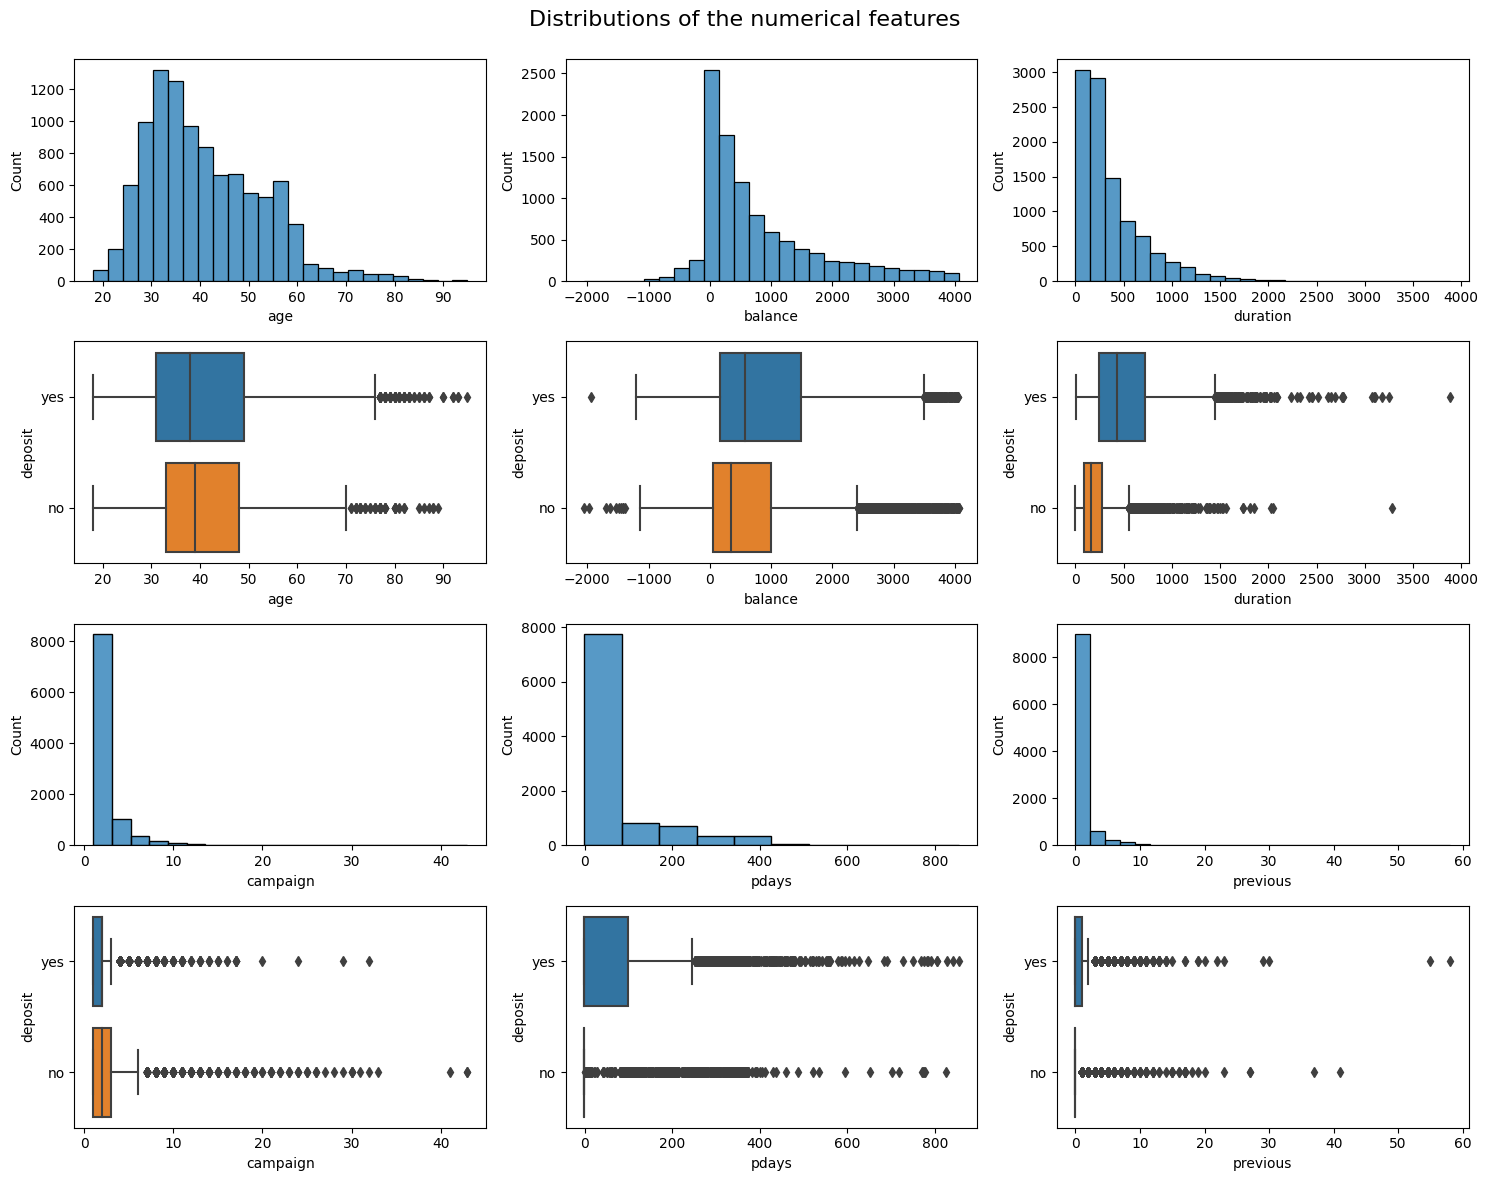

In [84]:
# рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат

display(df.describe())

fig, ax = plt.subplots(4,3, figsize=(15,12))
sns.histplot(df['age'], bins=25, ax=ax[0,0])       # Возраст
sns.histplot(df['balance'], bins=25, ax=ax[0,1])   # Баланс
sns.histplot(df['duration'], bins=25, ax=ax[0,2])  # Продолжительность контакта
sns.boxplot(data=df, x='age', y='deposit', ax=ax[1,0]) 
sns.boxplot(data=df, x='balance', y='deposit', ax=ax[1,1])
sns.boxplot(data=df, x='duration', y='deposit', ax=ax[1,2])
sns.histplot(df['campaign'], bins=20, ax=ax[2,0])  # Количество контактов
sns.histplot(df['pdays'], bins=10, ax=ax[2,1])     # Количество дней после предыдущей кампании
sns.histplot(df['previous'], bins=25, ax=ax[2,2])  # Количество предыдущих контактов
sns.boxplot(data=df, x='campaign', y='deposit', ax=ax[3,0])
sns.boxplot(data=df, x='pdays', y='deposit', ax=ax[3,1])
sns.boxplot(data=df, x='previous', y='deposit', ax=ax[3,2])
plt.suptitle('Distributions of the numerical features\n', fontsize=16)
plt.tight_layout()

### Задания 4 и 5

In [85]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
types = df.dtypes
cat_features = list(types[(types == 'object')].index)
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


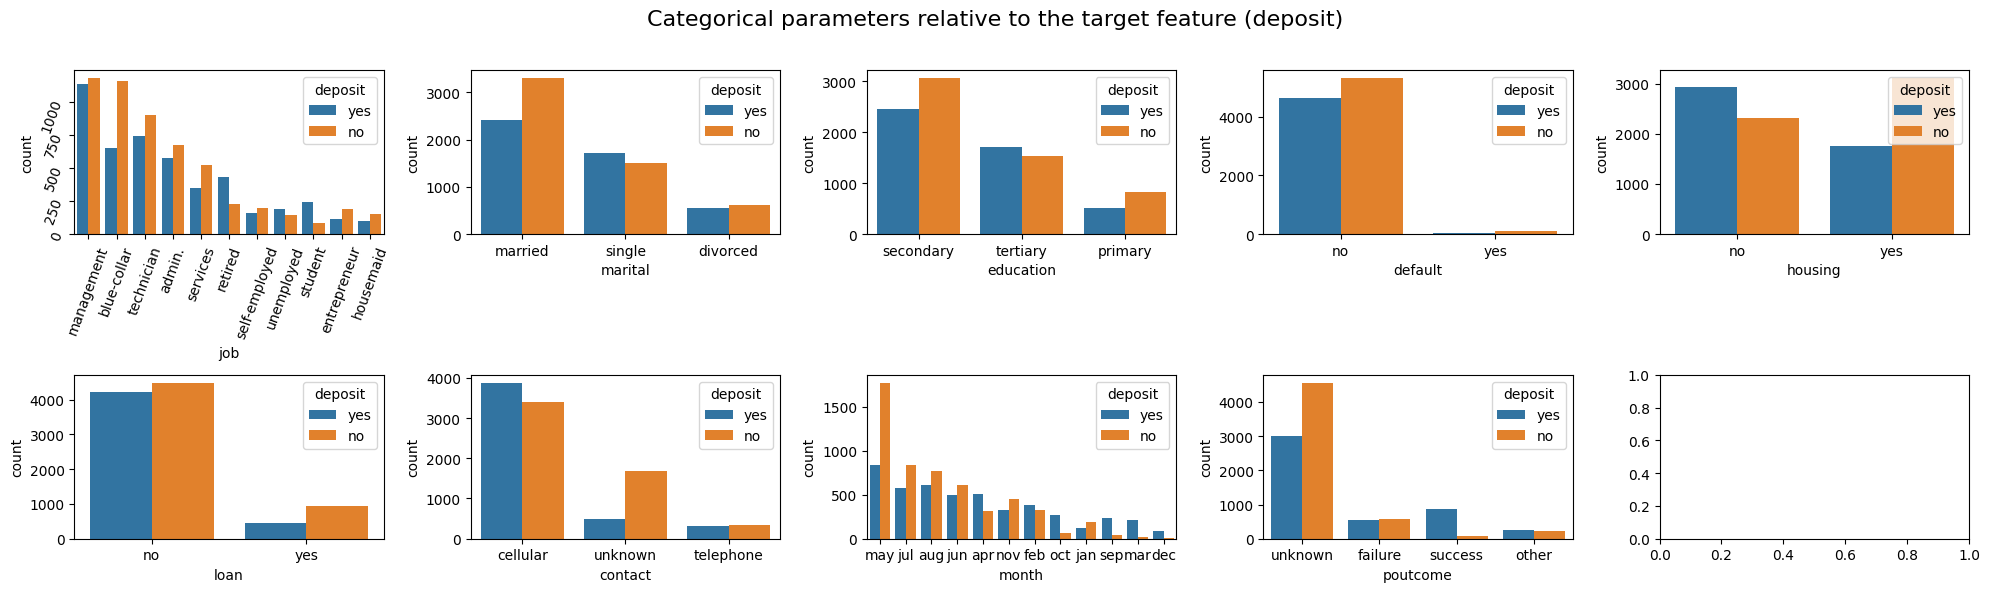

In [86]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#постройте визуализации, иллюстрирующие результаты

display(df.describe(include='object'))

fig, ax = plt.subplots(2,5, figsize=(20,6))

# Сфера занятости
sns.countplot(
    data=df, x='job', hue='deposit', 
    order=df['job'].value_counts().index, ax=ax[0,0])

# Семейное положение
sns.countplot(
    data=df, x='marital', hue='deposit',
    order=df['marital'].value_counts().index, ax=ax[0,1])

# Уровень образования
sns.countplot(
    data=df, x='education', hue='deposit',
    order=df['education'].value_counts().index, ax=ax[0,2])

# Наличие просроченного кредита
sns.countplot(
    data=df, x='default', hue='deposit',
    order=df['default'].value_counts().index, ax=ax[0,3])

# Наличие ипотеки
sns.countplot(
    data=df, x='housing', hue='deposit',
    order=df['housing'].value_counts().index, ax=ax[0,4])

# Наличие потребительского кредита
sns.countplot(
    data=df, x='loan', hue='deposit',
    order=df['loan'].value_counts().index, ax=ax[1,0])

# Тип контакта с клиентом
sns.countplot(
    data=df, x='contact', hue='deposit', 
    order=df['contact'].value_counts().index, ax=ax[1,1])

# Месяц последнего контакта с клиентом
sns.countplot(
    data=df, x='month', hue='deposit',
    order=df['month'].value_counts().index, ax=ax[1,2])

# Результат предыдущей маркетинговой кампании
sns.countplot(
    data=df, x='poutcome', hue='deposit',
    order=df['poutcome'].value_counts().index, ax=ax[1,3])
ax[0,0].tick_params(labelrotation=70)
plt.suptitle(
    'Categorical parameters relative to the target feature (deposit)\n',
    fontsize=16)
plt.tight_layout()


### Задание 6

In [87]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
df.groupby('poutcome')['deposit'].value_counts().unstack()

deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


### Задание 7

In [88]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
(df.groupby('month')['deposit'].value_counts(normalize=True).unstack() \
    * 100).sort_values('no', ascending=False)  


deposit,no,yes
month,,
may,67.863966,32.136034
jan,60.815047,39.184953
jul,58.956276,41.043724
nov,58.461538,41.538462
aug,55.956679,44.043321
jun,54.891304,45.108696
feb,45.557123,54.442877
apr,38.192771,61.807229
oct,18.507463,81.492537


### Задание 8

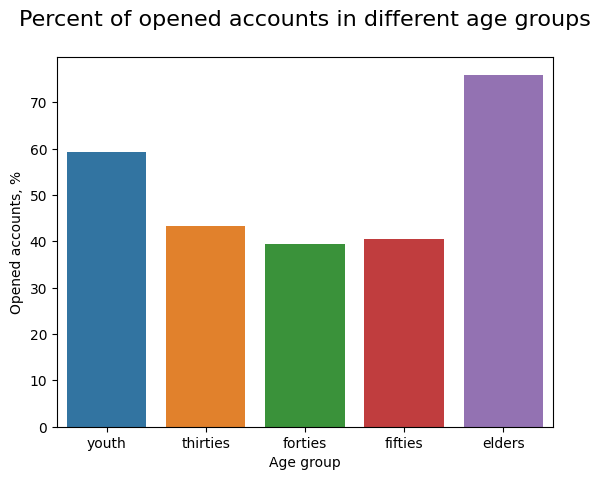

In [89]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def age_group(x):
    if x < 30:
        return 'youth'
    elif 30 <= x < 40:
        return 'thirties'
    elif 40 <= x < 50:
        return 'forties'
    elif 50 <= x < 60:
        return 'fifties' 
    else:
        return 'elders'   


df['age_group'] = df['age'].apply(age_group)

piv_tab = (df.groupby('age_group')['deposit'].value_counts(normalize=True) \
    * 100).unstack().reset_index() # процент отказов/согласия по группам
ax = sns.barplot(
    data=piv_tab, x='age_group', y='yes', 
    order=['youth', 'thirties', 'forties', 'fifties', 'elders'])
ax.set(ylabel='Opened accounts, %', xlabel='Age group')
ax.set_title('Percent of opened accounts in different age groups\n', 
             fontsize=16);

### Задания 9 и 10

In [90]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
(df.groupby('marital')['deposit'].value_counts(normalize=True).unstack() \
    * 100).sort_values('no', ascending=False)

deposit,no,yes
marital,,
married,57.795276,42.204724
divorced,53.016143,46.983857
single,46.591970,53.408030


In [91]:

# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
(df.groupby('education')['deposit'].value_counts(normalize=True).unstack() \
    * 100).sort_values('no', ascending=False)

deposit,no,yes
education,,
primary,61.675315,38.324685
secondary,55.573681,44.426319
tertiary,47.113307,52.886693


In [92]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
(df.groupby('job')['deposit'].value_counts(normalize=True).unstack() \
    * 100).sort_values('no', ascending=False)

deposit,no,yes
job,,
blue-collar,63.918096,36.081904
entrepreneur,63.000000,37.000000
housemaid,60.714286,39.285714
services,60.253456,39.746544
self-employed,55.027933,44.972067
technician,54.945055,45.054945
admin.,53.932584,46.067416
management,50.971922,49.028078
unemployed,43.072289,56.927711


### Задание 11

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


marital,divorced,married,single
education,,,
primary,91,641,100
secondary,370,1830,866
tertiary,163,832,531


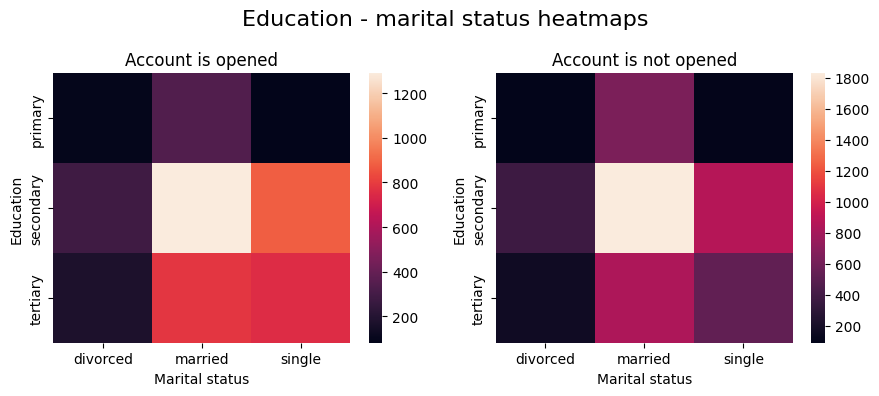

In [93]:


# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

success = df[df['deposit']=='yes']
fail = df[df['deposit']=='no']
success_pivot = success.groupby(
    ['education', 'marital'])['marital'].count().unstack()
## or:
#success_pivot = pd.pivot_table(success,     
#    index='education', columns='marital', values='age', aggfunc='count')  
fail_pivot = fail.groupby(
    ['education', 'marital'])['marital'].count().unstack()

display(success_pivot, fail_pivot)

fig, ax = plt.subplots( 1, 2, figsize=(9,4))
sns.heatmap(success_pivot, ax=ax[0])
sns.heatmap(fail_pivot, ax=ax[1])
ax[0].set_title('Account is opened')
ax[1].set_title('Account is not opened')
ax[0].set(xlabel='Marital status', ylabel='Education')
ax[1].set(xlabel='Marital status', ylabel='Education')
plt.suptitle('Education - marital status heatmaps', fontsize=16)
plt.tight_layout()



## Часть 3: преобразование данных

### Задание 1

In [94]:
# преобразуйте уровни образования

# Порядковое кодирование
# 0 - primary, 1 - secondary, 2 - tertiary
label_enc = preprocessing.LabelEncoder()
df['education'] = label_enc.fit_transform(df['education'])


print(sum(df['education']))




11995


### Задания 2 и 3

In [95]:
# преобразуйте бинарные переменные в представление из нулей и единиц
df.replace({'yes': 1, 'no': 0}, inplace=True)

In [96]:
print(round(df['deposit'].std(), 3))

0.499


In [97]:


a= df['default'].mean()
b= df['housing'].mean()
c= df['loan'].mean()
print(round(a+b+c, 3))



0.635


### Задание 4

In [98]:
# создайте дамми-переменные
dummies = pd.get_dummies(df[[
    'job', 'marital', 'contact', 'month', 'poutcome']])
df = pd.concat([df, dummies], axis=1)

In [99]:


df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   job                10105 non-null  object 
 2   marital            10105 non-null  object 
 3   education          10105 non-null  int64  
 4   default            10105 non-null  int64  
 5   balance            10105 non-null  float64
 6   housing            10105 non-null  int64  
 7   loan               10105 non-null  int64  
 8   contact            10105 non-null  object 
 9   day                10105 non-null  int64  
 10  month              10105 non-null  object 
 11  duration           10105 non-null  int64  
 12  campaign           10105 non-null  int64  
 13  pdays              10105 non-null  int64  
 14  previous           10105 non-null  int64  
 15  poutcome           10105 non-null  object 
 16  deposit            101

In [100]:


# Удаляем преобразованные признаки типа object

obj_cols = df.select_dtypes('object').columns
df.drop(columns=obj_cols, inplace=True)



### Задания 5 и 6

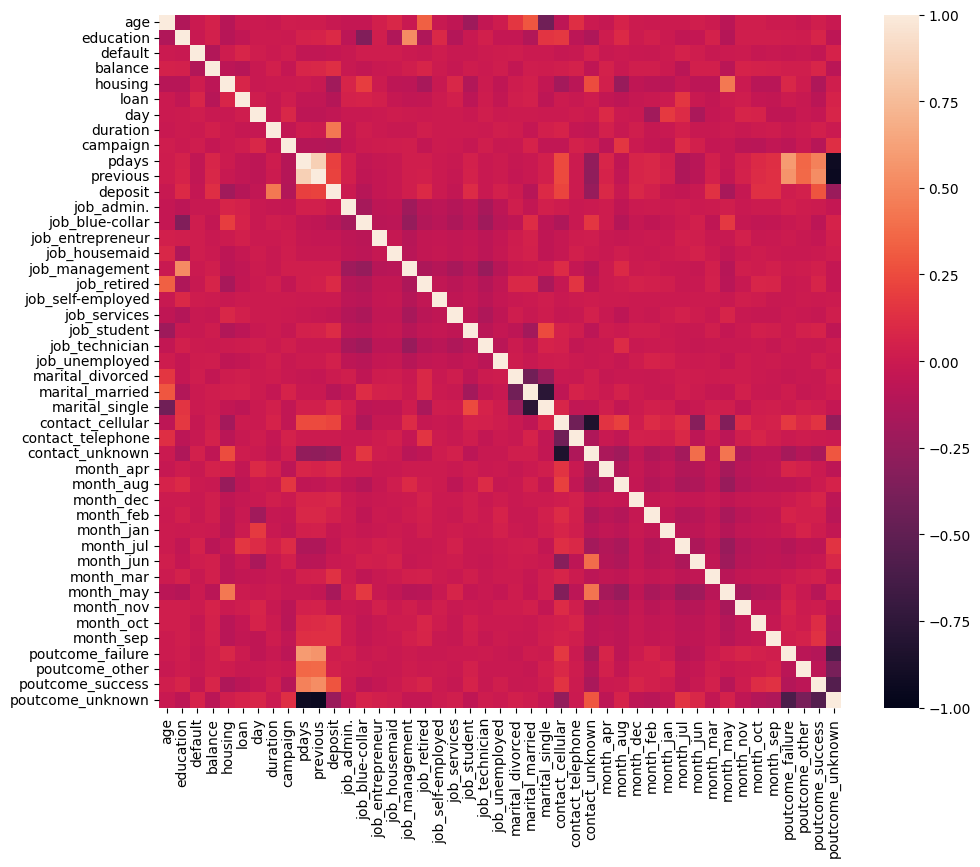

In [101]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
# Корреляционная матрица 
# Используем корреляцию Кендала - распределение признака может быть 
# не нормальным, связь признаков не обязательно является монотонной функцией
corr_matrix = df.corr(method='kendall')

# Тепловая карта
fig = plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix,  vmin=-1, vmax=1);

In [102]:
# Вычисляем мультиколлинеарные признаки, порог 0.9 
# (порог в соответствии с требованиями задания).
# Использую заготовленную функцию определения мультиколлинеарных признаков

def get_correlated(corr_matrix, thres=0.7):
    """Getting correlated pairs from a correlation matrix 
       with correlation coefficients higher than the threshold

    Args:
        corr_matrix (pandas DataFrame): correlation matrix (e.g., from df.corr())
        thres (float, optional): threshold. Defaults to 0.7 (i.e., coeff > 0.7 or coeff < -0.7).

    Returns:
        pandas Series: correlated pairs and correlation coefficients
    """
    
    correlated_pairs = {}
    
    for col in corr_matrix.columns:
        positive_filter = corr_matrix[col] >= thres
        negative_filter = corr_matrix[col] <= -thres
        match_series = corr_matrix[col][positive_filter | negative_filter]
        for match in match_series.index:
            if match != col and match + ' -- ' + col not in correlated_pairs.keys():
                correlated_pairs.update({col + ' -- ' + match: match_series[match]})
   
    return pd.Series(correlated_pairs).sort_values()


get_correlated(corr_matrix, thres=0.9)

previous -- poutcome_unknown   -0.938271
pdays -- poutcome_unknown      -0.925560
dtype: float64

In [103]:
display(df['poutcome_unknown'].value_counts())
display(df['previous'].value_counts()[:3])
display(df['pdays'].value_counts()[:3])

1    7570
0    2535
Name: poutcome_unknown, dtype: int64

0    7568
1     796
2     612
Name: previous, dtype: int64

-1      7568
 92       88
 182      77
Name: pdays, dtype: int64

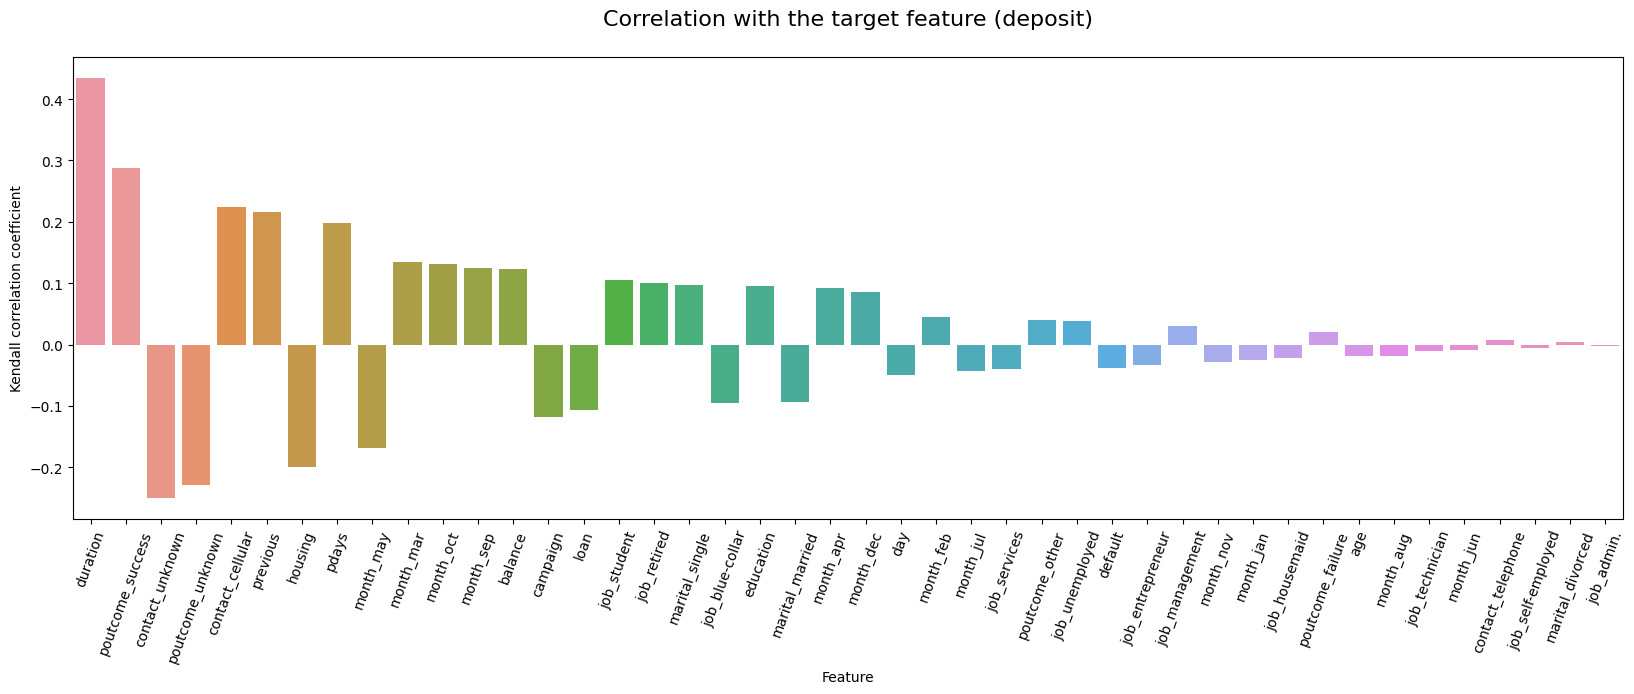

In [104]:


# Корреляция с целевым признаком

fig = plt.figure(figsize=(20,6))
plot_df = corr_matrix.drop('deposit')  # Убираем корреляцию "сам с собой"
feature_order = abs(plot_df['deposit']).sort_values(ascending=False).index
ax = sns.barplot(
    data=plot_df.reset_index(), x='index', y='deposit',
    order = feature_order)
plt.xticks(rotation=70)
ax.set(xlabel='Feature', ylabel='Kendall correlation coefficient')
ax.set_title('Correlation with the target feature (deposit)\n', fontsize=16);



### Задания 7 и 8

In [105]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [106]:
# рассчитайте необходимые показатели


print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')



Размер обучающей выборки: 6770
Размер тестовой выборки: 3335


In [107]:
mean_y_test = np.mean(y_test)
print("Среднее значение целевой переменной на тестовой выборке:",round(mean_y_test, 2))



Среднее значение целевой переменной на тестовой выборке: 0.46


### Задание 9

In [108]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_train, y_train)
selected_cols = selector.get_feature_names_out()
print(f'Selected features:\n {selected_cols}')
X_train = selector.transform(X_train)
X_test =selector.transform(X_test)

Selected features:
 ['balance' 'housing' 'loan' 'duration' 'campaign' 'pdays' 'previous'
 'contact_cellular' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown']


### Задание 10

In [109]:
# нормализуйте данные с помощью minmaxsxaler

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [110]:
mean_X_test_1 = np.mean(X_test[:,0])
print("Среднее значение первого предиктора на тестовой выборке:", round(mean_X_test_1, 2))



Среднее значение первого предиктора на тестовой выборке: 0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [111]:
# обучите логистическую регрессию и рассчитайте метрики качества
logregr = linear_model.LogisticRegression(
    random_state=42, solver='sag', max_iter=1000)
logregr.fit(X_train, y_train)
y_train_pred = logregr.predict(X_train)
y_test_pred = logregr.predict(X_test)
print('Обучающая выборка:\n{}'.format(
    metrics.classification_report(y_train, y_train_pred, digits=3)))
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))

Обучающая выборка:
              precision    recall  f1-score   support

           0      0.807     0.876     0.840      3634
           1      0.840     0.758     0.797      3136

    accuracy                          0.821      6770
   macro avg      0.824     0.817     0.818      6770
weighted avg      0.822     0.821     0.820      6770

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.790     0.866     0.826      1790
           1      0.825     0.733     0.776      1545

    accuracy                          0.804      3335
   macro avg      0.807     0.799     0.801      3335
weighted avg      0.806     0.804     0.803      3335



### Задания 2,3,4

In [119]:
# обучите решающие деревья, настройте максимальную глубину
dtree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree.fit(X_train, y_train)
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
print('Обучающая выборка:\n{}'.format(
    metrics.classification_report(y_train, y_train_pred, digits=3)))
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))


Обучающая выборка:
              precision    recall  f1-score   support

           0      0.999     1.000     1.000      3634
           1      1.000     0.999     1.000      3136

    accuracy                          1.000      6770
   macro avg      1.000     1.000     1.000      6770
weighted avg      1.000     1.000     1.000      6770

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.773     0.765     0.769      1790
           1      0.731     0.740     0.736      1545

    accuracy                          0.754      3335
   macro avg      0.752     0.753     0.752      3335
weighted avg      0.754     0.754     0.754      3335



### Задание 5

Максимальная точность на тесте: 0.804
Оптимальная глубина дерева: 6


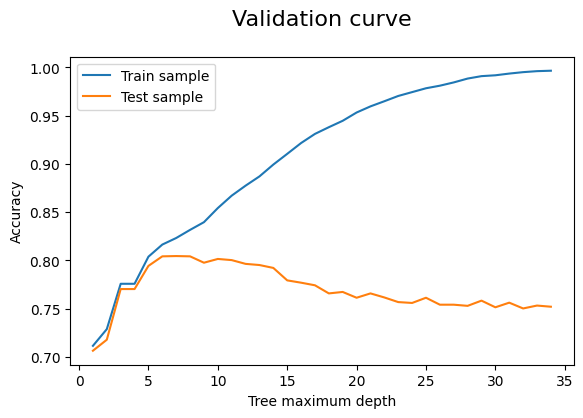

In [120]:
# подберите оптимальные параметры с помощью gridsearch


# Перебираем значения max_deph 
# Считаем accuracy на тренировочной и тестовой выборках
train_scores = []
test_scores = []
for max_depth in range(1,35):
    dtree = tree.DecisionTreeClassifier(
        criterion='entropy', random_state=42, max_depth=max_depth)
    dtree.fit(X_train, y_train)
    y_train_pred = dtree.predict(X_train)
    y_test_pred = dtree.predict(X_test)
    train_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    test_scores.append(metrics.accuracy_score(y_test, y_test_pred))
    
# Рисунок
max_depth = list(range(1,35))
fig = plt.figure(figsize=(6.5, 4))
ax = sns.lineplot(x=max_depth, y=train_scores, label='Train sample')
sns.lineplot(x=max_depth, y=test_scores, label='Test sample')
ax.set(xlabel='Tree maximum depth', ylabel='Accuracy')
ax.set_title('Validation curve\n', fontsize=16);

# Оптимальный параметр
print(f'Максимальная точность на тесте: {np.amax(test_scores):.3f}')
print(f'Оптимальная глубина дерева: {np.argmax(test_scores)}')



In [123]:


# подберите оптимальные параметры с помощью gridsearch

# Сетка параметров - по условию задания
estimator = tree.DecisionTreeClassifier(
    criterion='entropy', random_state=42)
param_grid = {'min_samples_split': [2, 5, 7, 10], 'max_depth': [3,5,7]}
gsearch = GridSearchCV(
    estimator=estimator, param_grid=param_grid, scoring='f1')
gsearch.fit(X_train, y_train)

y_train_pred = gsearch.predict(X_train)
y_test_pred = gsearch.predict(X_test)

print(f'Наилучшие значения гиперпараметров: {gsearch.best_params_}')
print('Обучающая выборка:\n{}'.format(
    metrics.classification_report(y_train, y_train_pred, digits=3)))
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))



Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 10}
Обучающая выборка:
              precision    recall  f1-score   support

           0      0.821     0.855     0.838      3634
           1      0.823     0.784     0.803      3136

    accuracy                          0.822      6770
   macro avg      0.822     0.819     0.820      6770
weighted avg      0.822     0.822     0.822      6770

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.805     0.839     0.822      1790
           1      0.804     0.764     0.784      1545

    accuracy                          0.804      3335
   macro avg      0.804     0.802     0.803      3335
weighted avg      0.804     0.804     0.804      3335



# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [124]:


# обучите на ваших данных случайный лес

# Параметры модели - по условию задания
rf = ensemble.RandomForestClassifier(
    n_estimators=100, criterion='gini', min_samples_leaf=5, 
    max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))



Тестовая выборка:
              precision    recall  f1-score   support

           0      0.849     0.825     0.837      1790
           1      0.803     0.830     0.817      1545

    accuracy                          0.827      3335
   macro avg      0.826     0.828     0.827      3335
weighted avg      0.828     0.827     0.827      3335



### Задания 2 и 3

In [125]:

# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

gboost = ensemble.GradientBoostingClassifier(
    learning_rate=0.05, n_estimators=300, min_samples_leaf=5,
    max_depth=5, random_state=42)
gboost.fit(X_train, y_train)

y_test_pred = gboost.predict(X_test)
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.850     0.816     0.833      1790
           1      0.796     0.833     0.814      1545

    accuracy                          0.824      3335
   macro avg      0.823     0.825     0.824      3335
weighted avg      0.825     0.824     0.824      3335



### Задание 4

In [126]:
# объедините уже известные вам алгоритмы с помощью стекинга 

dtree = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=7, min_samples_split=7, random_state=42)
logregr = linear_model.LogisticRegression(
    solver='sag', max_iter=1000, random_state=42)
gboost = ensemble.GradientBoostingClassifier(
    learning_rate=0.05, n_estimators=300, min_samples_leaf=5, 
    max_depth=5, random_state=42)

estimators = [
    ('dtree', dtree), ('logregr', logregr), ('gboost', gboost)]

stacked = ensemble.StackingClassifier(estimators=estimators)
stacked.fit(X_train, y_train)

y_test_pred = stacked.predict(X_test)
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.834     0.838     0.836      1790
           1      0.811     0.806     0.809      1545

    accuracy                          0.823      3335
   macro avg      0.822     0.822     0.822      3335
weighted avg      0.823     0.823     0.823      3335



### Задание 5

In [127]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
gboost = ensemble.GradientBoostingClassifier(
    learning_rate=0.05, n_estimators=300, min_samples_leaf=5, 
    max_depth=5, random_state=42)
gboost.fit(X_train, y_train)
sorted(list(zip(selected_cols, gboost.feature_importances_)), 
       key=lambda x: x[1], reverse=True)

[('duration', 0.5141398765213598),
 ('poutcome_success', 0.11898787547990078),
 ('contact_unknown', 0.07895700907187315),
 ('balance', 0.06192304113186341),
 ('pdays', 0.05540967515546267),
 ('housing', 0.050464341325235834),
 ('month_mar', 0.02702500983408113),
 ('month_oct', 0.019516071222870874),
 ('campaign', 0.018007562519618124),
 ('month_sep', 0.015612600809316693),
 ('month_may', 0.014682145372349577),
 ('loan', 0.012714043147003596),
 ('previous', 0.007627283675145594),
 ('poutcome_unknown', 0.002944805803233918),
 ('contact_cellular', 0.0019886589306850316)]

### Задания 6,7,8

In [129]:
import optuna
# реализуйте оптимизацию гиперпараметров с помощью Optuna
# (реализуем для случайного леса)

def obj_func(trial):
    # пространство гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

    # модель
    model = ensemble.RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42)
    
    # обучаем модель
    model.fit(X_train, y_train)
    score = cross_val_score(
        model, X_train, y_train, cv=5, scoring='f1').mean()
    
    return score


# Поиск оптимальных гиперпараметров
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(
    sampler=sampler, study_name='RF_Classifier', direction='maximize')
study.optimize(obj_func, n_trials=10)
print(f'Лучшие параметры:\n{study.best_params}')


[I 2023-06-25 16:39:26,365] A new study created in memory with name: RF_Classifier
[I 2023-06-25 16:39:29,186] Trial 0 finished with value: 0.8194384044046383 and parameters: {'n_estimators': 137, 'max_depth': 29, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8194384044046383.
[I 2023-06-25 16:39:33,006] Trial 1 finished with value: 0.8230739833960005 and parameters: {'n_estimators': 160, 'max_depth': 13, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8230739833960005.
[I 2023-06-25 16:39:35,502] Trial 2 finished with value: 0.8178520153816178 and parameters: {'n_estimators': 105, 'max_depth': 28, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8230739833960005.
[I 2023-06-25 16:39:38,528] Trial 3 finished with value: 0.8166311996288224 and parameters: {'n_estimators': 171, 'max_depth': 10, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.8230739833960005.
[I 2023-06-25 16:39:42,678] Trial 4 finished with value: 0.8219568870577019 and parameters: {'n_estimato

Лучшие параметры:
{'n_estimators': 160, 'max_depth': 13, 'min_samples_leaf': 3}
